In [3]:
""" split train set and test set """
import csv
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split

from sklearn.metrics import accuracy_score  

data = pd.read_csv('/Users/minghuijin/Desktop/movie.csv')

X = data.drop(['Y', 'name', 'critic_score', 'audience_score'],axis=1)
y = data['Y']

data_train, data_test, l_train, l_test = train_test_split(X, y, test_size=0.33, random_state=42)
data_train.to_csv('/Users/minghuijin/Desktop/x_train.csv',index=False)
data_test.to_csv('/Users/minghuijin/Desktop/x_test.csv',index=False)
l_train.to_csv('/Users/minghuijin/Desktop/y_train.csv',index=False)
l_test.to_csv('/Users/minghuijin/Desktop/y_test.csv',index=False)

In [4]:
""" process test & train set """
import csv
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

x_train = pd.read_csv('/Users/minghuijin/Desktop/x_train.csv')
clean_indexes = [i for i in range(len(x_train)) if x_train['in_theater'][i] == 0]
x_train = x_train.drop(clean_indexes)
x_train = x_train.drop("in_theater", axis=1)
y_train = pd.read_csv('/Users/minghuijin/Desktop/y_train.csv',header = None)
y_train = y_train.drop(clean_indexes)

x_test = pd.read_csv('/Users/minghuijin/Desktop/x_test.csv')
clean_indexes_2 = [i for i in range(len(x_test)) if x_test['in_theater'][i] == 0]
x_test = x_test.drop(clean_indexes_2)
x_test = x_test.drop("in_theater", axis=1)                        
y_test = pd.read_csv('/Users/minghuijin/Desktop/y_test.csv',header = None)
y_test = y_test.drop(clean_indexes_2)

feature_names = ['runtime', 'rating_G', 'rating_NR', 'rating_PG', 'rating_PG13', 'rating_R', 'rating_NC17', 
                 'genre_action', 'genre_animation', 'genre_foreign', 'genre_classics', 'genre_comedy', 
                 'genre_documentary', 'genre_drama', 'genre_horror', 'genre_family', 'genre_mystery', 'genre_romance', 
                 'genre_fantasy', 'director_score', 'writer_score', 'actor_score', 'studio_score', 
                 'theater_spring', 'theater_summer', 'theater_fall', 'theater_winter', 'theater_year', 'is_wide']

In [5]:
""" plot feature importance """
from matplotlib import pyplot as plt
def plot_feature_importance(clf, feature_names):
    plt.figure(figsize = (25, 25))
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    # plt.yticks(pos, feature_names[sorted_idx])
    plt.yticks(pos, [feature_names[idx] for idx in sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [57]:
from sklearn.metrics import accuracy_score, f1_score 
def compute_score(pred, true):
    accuracy = accuracy_score(y_test, y_pred)
    print("accuarcy score: %.2f%%" % (accuracy*100.0))

    f1 = f1_score(y_test, y_pred)
    print("f1 score: %.2f%%" % (f1*100.0))

/Users/minghuijin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuarcy score: 79.49%
f1 score: 81.45%


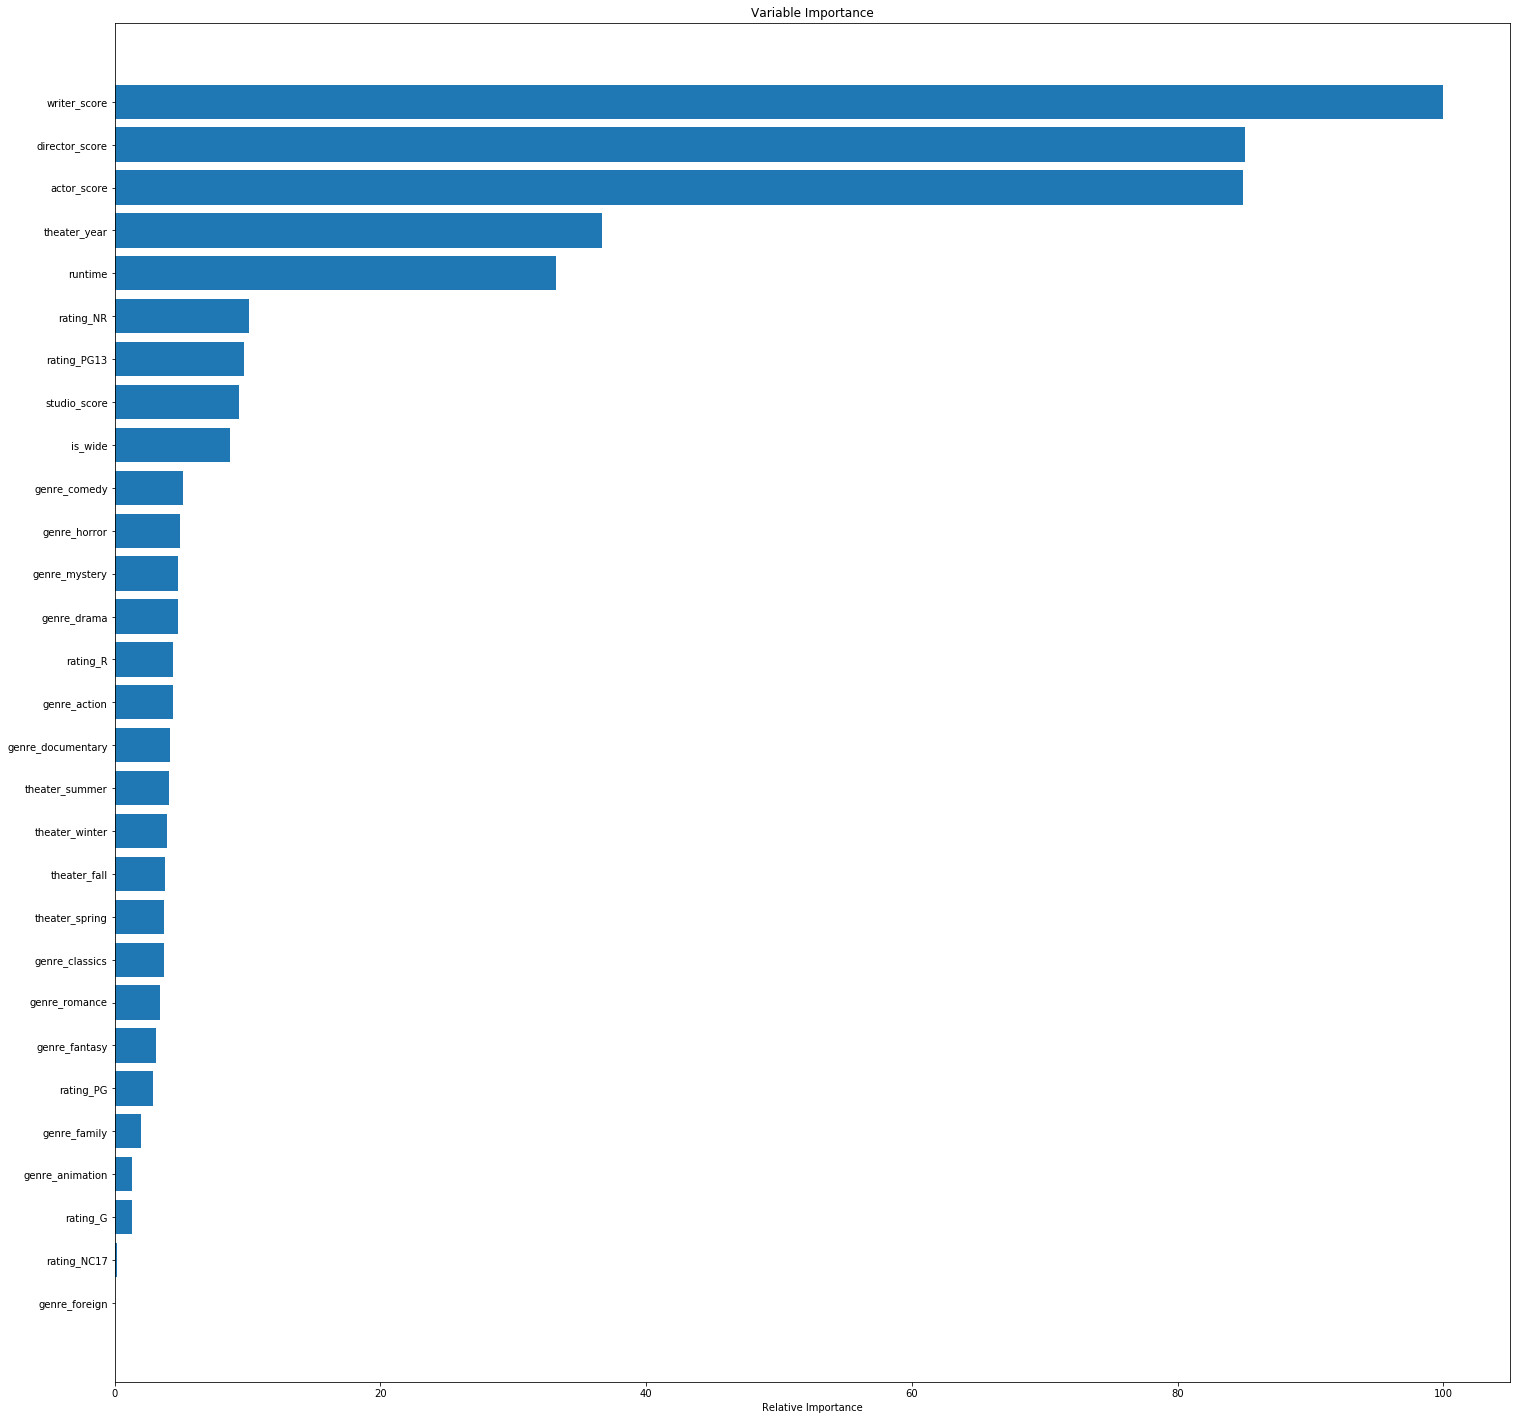

In [59]:
""" random foresttree"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=150, max_depth=13, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

compute_score(y_pred, y_test)

plot_feature_importance(clf, feature_names)

accuarcy score: 80.03%
f1 score: 81.72%


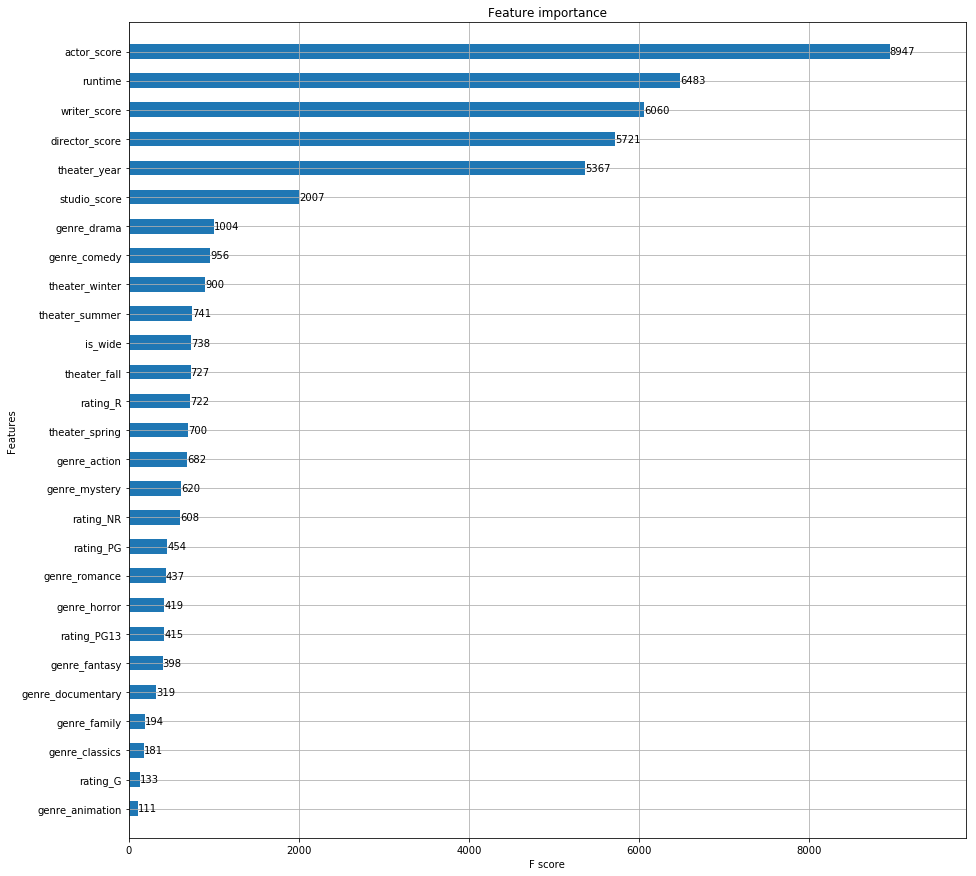

In [62]:
""" xgboost """
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import plot_importance

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.2,
    'max_depth': 15,
    'lambda': 2,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'min_child_weight': 2,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
}
plst = params.items()


dtrain = xgb.DMatrix(x_train, y_train) 
num_rounds = 100
model = xgb.train(plst, dtrain, num_rounds) 

dtest = xgb.DMatrix(x_test)
y_pred = model.predict(dtest)

compute_score(y_pred, y_test)

fig,ax = plt.subplots(figsize=(15,15))
plot_importance(model, height=0.5, ax=ax, max_num_features=64)
plt.show()

accuarcy score: 80.03%
f1 score: 81.72%


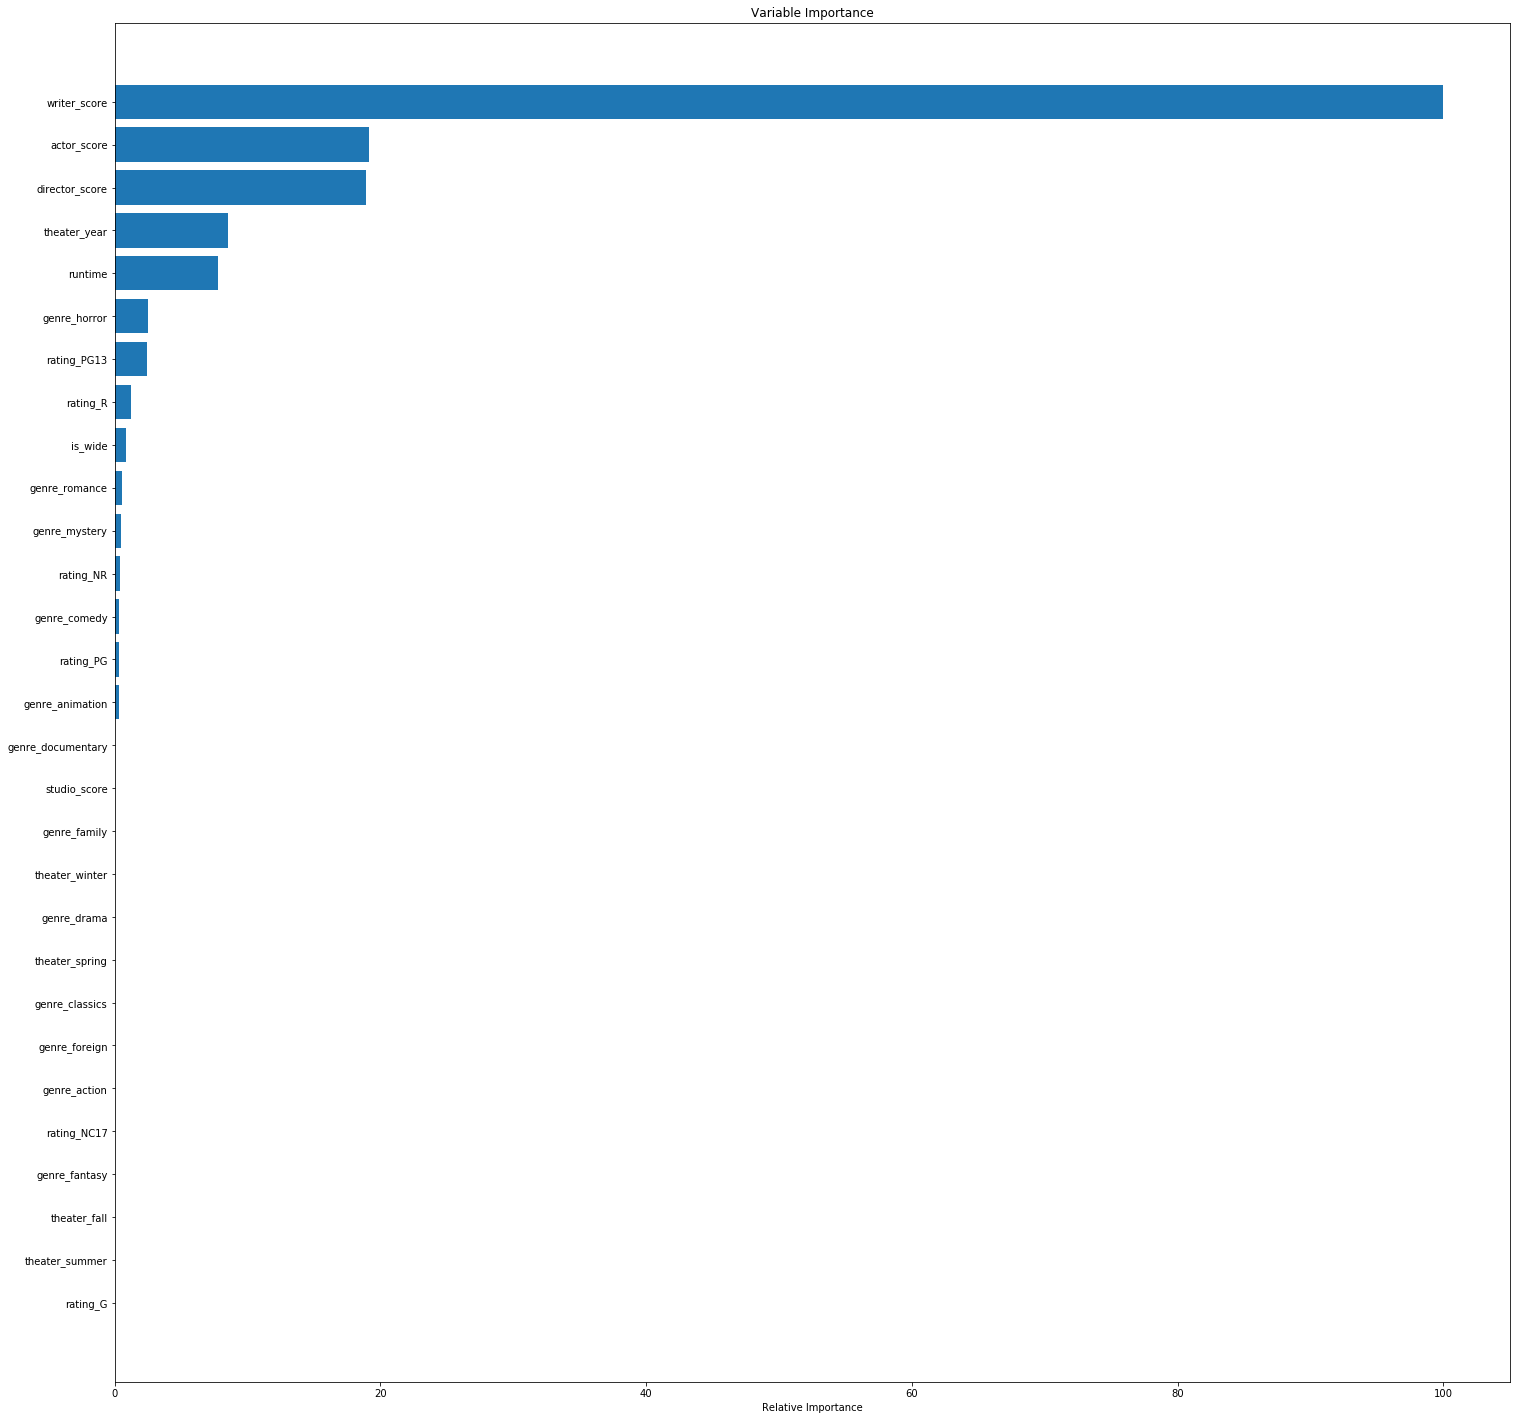

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score 

clf = DecisionTreeClassifier(min_samples_split=200, min_samples_leaf=8)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

compute_score(y_pred, y_test)

plot_feature_importance(clf, feature_names)

/Users/minghuijin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuarcy score: 79.15%
f1 score: 81.08%


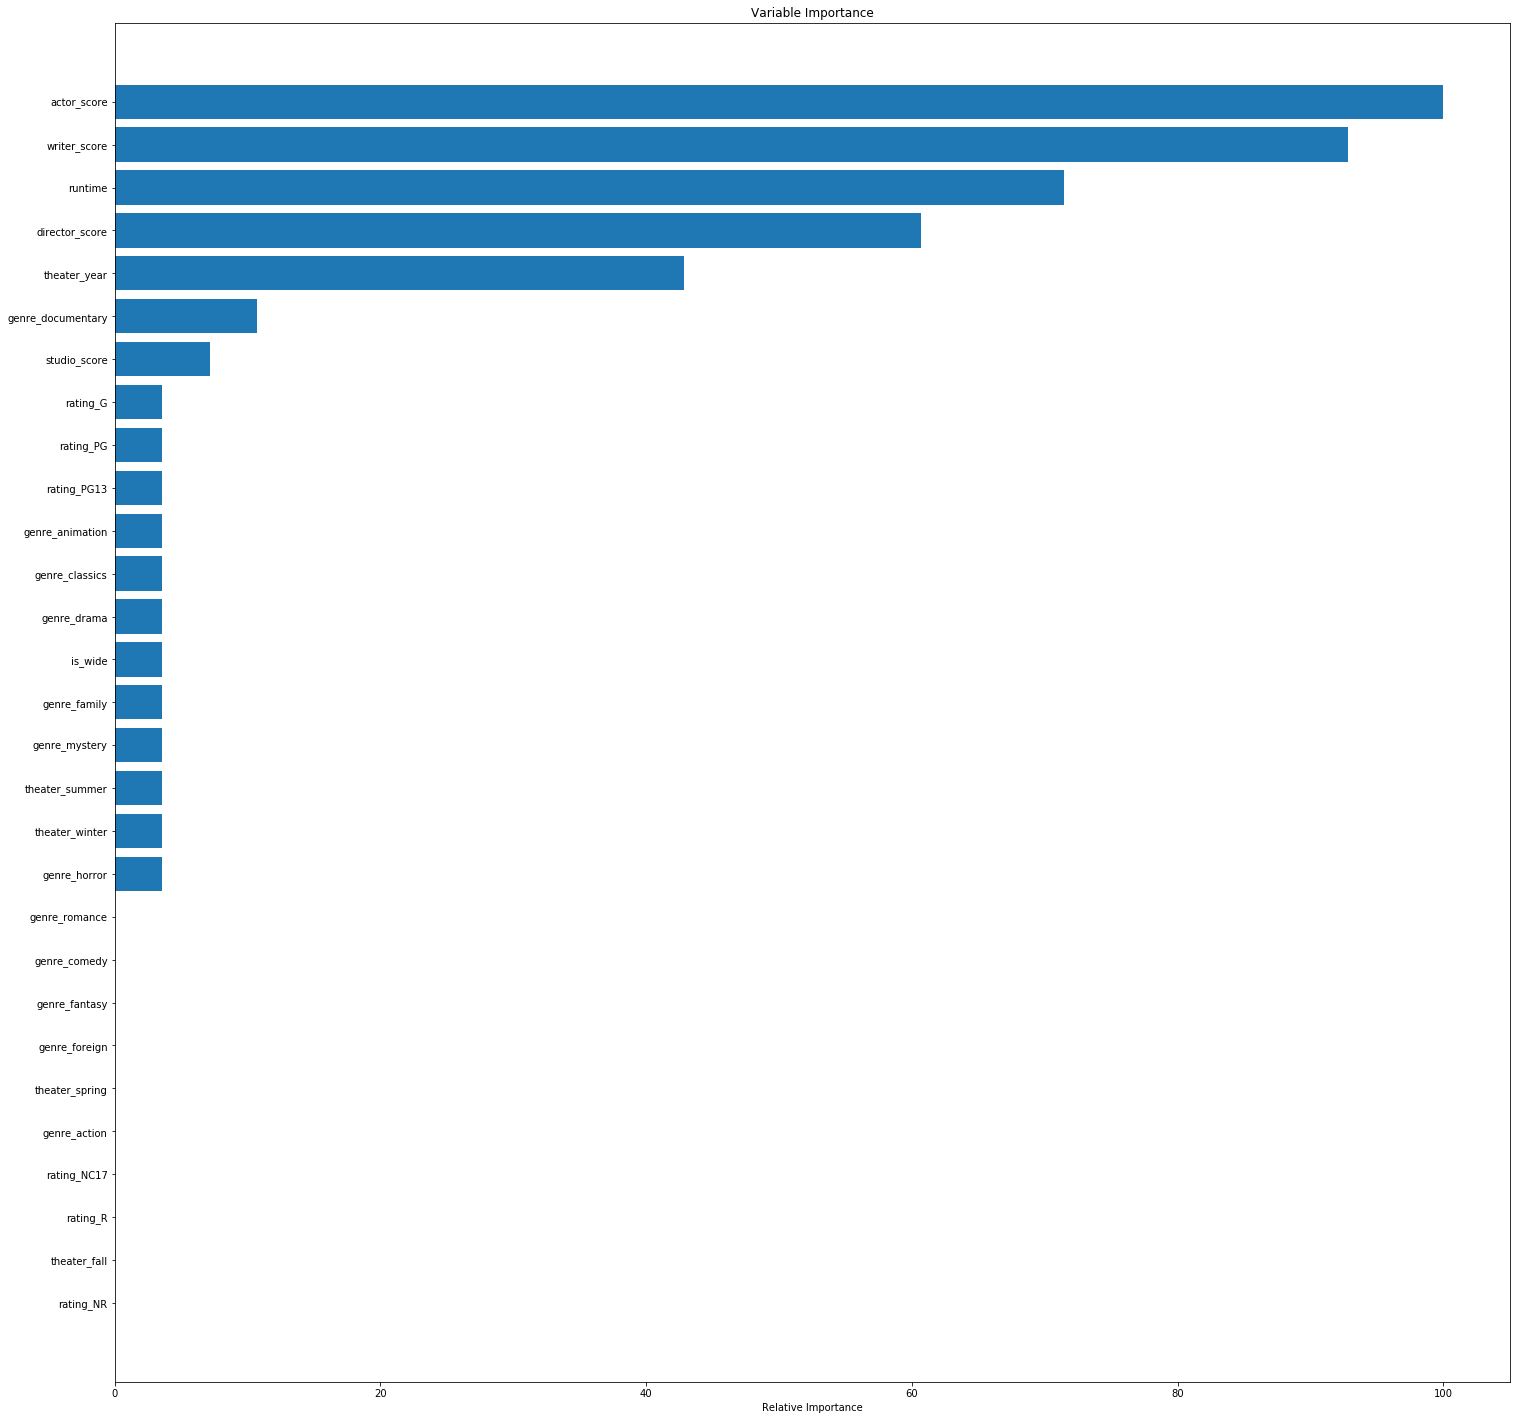

In [61]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=120, learning_rate=0.9) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

compute_score(y_pred, y_test)

plot_feature_importance(clf, feature_names)

/Users/minghuijin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuarcy score: 77.92%
f1 score: 79.81%


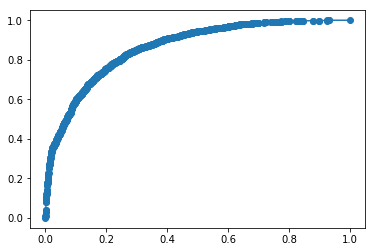

AUC = 0.8632416783394812


In [64]:
""" linear regression """
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

clf = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)

y_pred = clf.predict(x_test)
compute_score(y_pred, y_test)

# for i in range(len(feature_names)):
#     print(feature_names[i], ":", coefs[i])

scores = clf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, scores)  

plt.plot(fpr,tpr,marker = 'o')
plt.show()

AUC = auc(fpr, tpr)
print('AUC =', AUC)

In [66]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC(C=2, cache_size=200, class_weight=None, coef0=0.2,decision_function_shape=None, 
                              degree=3, gamma='auto', kernel='linear',max_iter=-1, probability=False, 
                              random_state=42, shrinking=True,tol=0.005, verbose=False))

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

compute_score(y_pred, y_test)

accuarcy score: 78.12%
f1 score: 80.20%


In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

clf = KNeighborsClassifier(n_neighbors=180, weights='uniform', algorithm='auto', leaf_size=5, p=1, metric='minkowski',n_jobs = 8)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

compute_score(y_pred, y_test)

/Users/minghuijin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


accuarcy score: 78.12%
f1 score: 80.20%


In [68]:
from sklearn.svm import SVC

clf =  SVC(C=0.5, kernel='linear', tol=0.05).fit(x_train, y_train)

y_pred = clf.predict(x_test) 

compute_score(y_pred, y_test)

/Users/minghuijin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuarcy score: 78.20%
f1 score: 80.26%
